# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "imperial"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | kovalam
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | altai
Processing Record 7 of Set 1 | kushiro
Processing Record 8 of Set 1 | bodo
Processing Record 9 of Set 1 | acarau
Processing Record 10 of Set 1 | kirakira
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | ardestan
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | taltal
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | vilyuchinsk
Processing Record 22 of Set 1 | ashburton
Processing Reco

Processing Record 39 of Set 4 | al mindak
Processing Record 40 of Set 4 | nguigmi
Processing Record 41 of Set 4 | veraval
Processing Record 42 of Set 4 | la passe
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | leirvik
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | les cayes
Processing Record 48 of Set 4 | malmberget
Processing Record 49 of Set 4 | fort mcmurray
Processing Record 0 of Set 5 | mil'kovo
Processing Record 1 of Set 5 | west island
Processing Record 2 of Set 5 | nacala
Processing Record 3 of Set 5 | am djarass
City not found. Skipping...
Processing Record 4 of Set 5 | simpang
Processing Record 5 of Set 5 | tamiahua
Processing Record 6 of Set 5 | frankfort
Processing Record 7 of Set 5 | vallenar
Processing Record 8 of Set 5 | kurayoshi
Processing Record 9 of Set 5 | kristiansund
Processing Record 10 of Set 5 | qalat
Processing Record 11 of Set 5 | rio grande
Processing Record 12 of Set 5 | k

Processing Record 34 of Set 8 | kataragama
City not found. Skipping...
Processing Record 35 of Set 8 | robat karim
Processing Record 36 of Set 8 | tonota
Processing Record 37 of Set 8 | kingscliff
Processing Record 38 of Set 8 | tumayr
Processing Record 39 of Set 8 | upata
Processing Record 40 of Set 8 | tazovsky
Processing Record 41 of Set 8 | aver-o-mar
Processing Record 42 of Set 8 | masuguru
Processing Record 43 of Set 8 | tutoia
Processing Record 44 of Set 8 | laguna
Processing Record 45 of Set 8 | hasaki
Processing Record 46 of Set 8 | alta gracia
Processing Record 47 of Set 8 | chibougamau
Processing Record 48 of Set 8 | atbasar
Processing Record 49 of Set 8 | susuman
Processing Record 0 of Set 9 | kachkanar
Processing Record 1 of Set 9 | puerto ayacucho
Processing Record 2 of Set 9 | villa de soto
Processing Record 3 of Set 9 | tofol
Processing Record 4 of Set 9 | palmer
Processing Record 5 of Set 9 | urbano santos
Processing Record 6 of Set 9 | guerrero negro
Processing Record

Processing Record 22 of Set 12 | betio village
Processing Record 23 of Set 12 | alotau
City not found. Skipping...
Processing Record 24 of Set 12 | laurel
Processing Record 25 of Set 12 | puerto lempira
Processing Record 26 of Set 12 | cide
Processing Record 27 of Set 12 | tromso
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,46.99,86,55,3.80,CL,1706672683
1,edinburgh of the seven seas,-37.0676,-12.3116,56.89,57,86,0.20,SH,1706672683
2,bethel,41.3712,-73.4140,34.36,77,100,8.05,US,1706672683
3,kovalam,8.3667,76.9967,86.09,74,75,1.14,IN,1706672684
4,bilibino,68.0546,166.4372,-28.70,99,100,0.36,RU,1706672684


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,46.99,86,55,3.80,CL,1706672683
1,edinburgh of the seven seas,-37.0676,-12.3116,56.89,57,86,0.20,SH,1706672683
2,bethel,41.3712,-73.4140,34.36,77,100,8.05,US,1706672683
3,kovalam,8.3667,76.9967,86.09,74,75,1.14,IN,1706672684
4,bilibino,68.0546,166.4372,-28.70,99,100,0.36,RU,1706672684


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

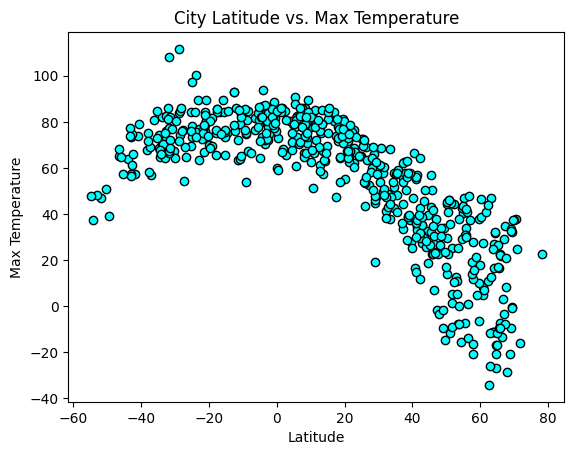

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

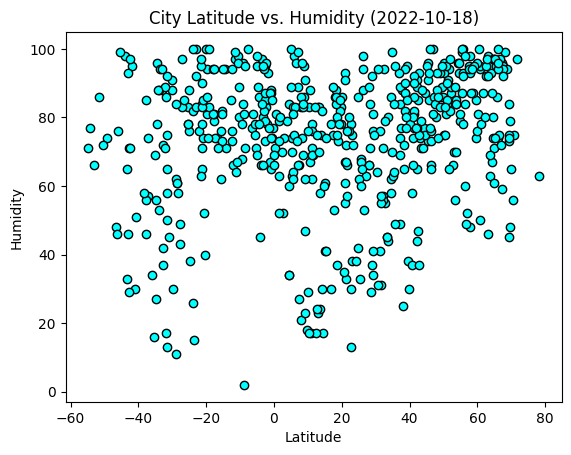

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

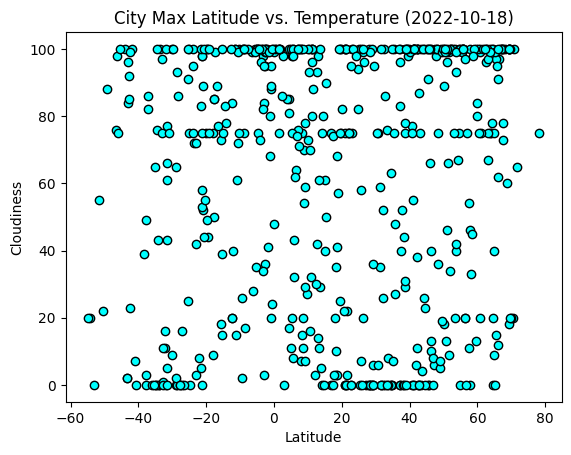

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

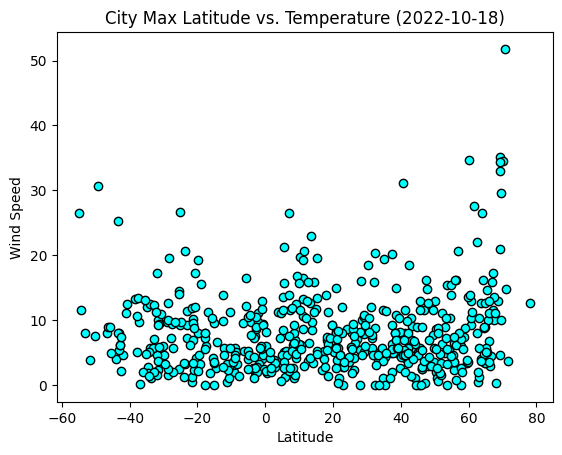

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def scatter_plots(x, y, position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker = 'o', facecolors = 'cyan', edgecolors = 'black')
    plt.plot(x, regress_values, "r-")
    plt.xlabel('Latitude')
    plt.annotate(line_eq, position, fontsize = 15, color = 'r')


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] >= 0), :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,34.36,77,100,8.05,US,1706672683
3,kovalam,8.3667,76.9967,86.09,74,75,1.14,IN,1706672684
4,bilibino,68.0546,166.4372,-28.70,99,100,0.36,RU,1706672684
5,altai,46.3722,96.2583,7.18,66,100,2.46,MN,1706672684
6,kushiro,42.9750,144.3747,27.55,74,75,5.75,JP,1706672684


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] <= 0), :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,46.99,86,55,3.80,CL,1706672683
1,edinburgh of the seven seas,-37.0676,-12.3116,56.89,57,86,0.20,SH,1706672683
8,acarau,-2.8856,-40.1200,79.07,85,3,7.61,BR,1706672685
9,kirakira,-10.4544,161.9205,83.41,80,100,11.25,SB,1706672685
10,waitangi,-43.9535,-176.5597,63.82,98,100,4.00,NZ,1706672685


###  Temperature vs. Latitude Linear Regression Plot

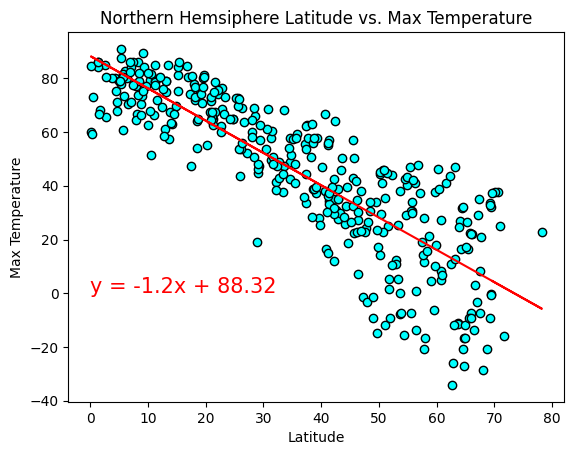

In [28]:
# Linear regression on Northern Hemisphere
northern_latitude = northern_hemi_df['Lat']
northern_temperature = northern_hemi_df['Max Temp']

scatter_plots(northern_latitude, northern_temperature, (0, 0))
plt.ylabel('Max Temperature')
plt.title('Northern Hemsiphere Latitude vs. Max Temperature')
plt.show()

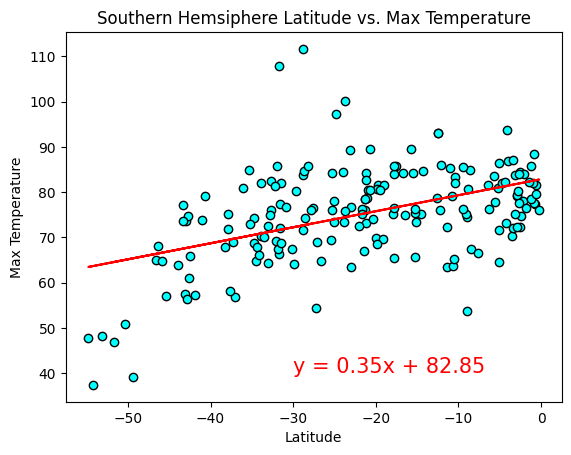

In [29]:
# Linear regression on Southern Hemisphere
southern_latitude = southern_hemi_df['Lat']
southern_temperature = southern_hemi_df['Max Temp']

scatter_plots(southern_latitude, southern_temperature, (-30, 40))
plt.ylabel('Max Temperature')
plt.title('Southern Hemsiphere Latitude vs. Max Temperature')
plt.show()

**Discussion about the linear relationship:** 

The Northern Hemisphere has a strong correlation between maximum temperature and latitude whereas the Southern Hemisphere has a moderate correlation. In both hemispheres the maximum temperature increases as you approach the equator. This is expected because you can assume that proximity to the equator would mean increased temperatures. 

### Humidity vs. Latitude Linear Regression Plot

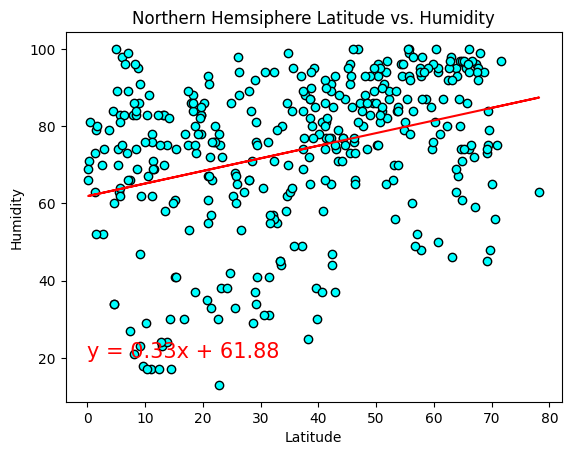

In [30]:
# Northern Hemisphere
northern_humidity = northern_hemi_df['Humidity']

scatter_plots(northern_latitude, northern_humidity, (0, 20))
plt.ylabel('Humidity')
plt.title('Northern Hemsiphere Latitude vs. Humidity')
plt.show()

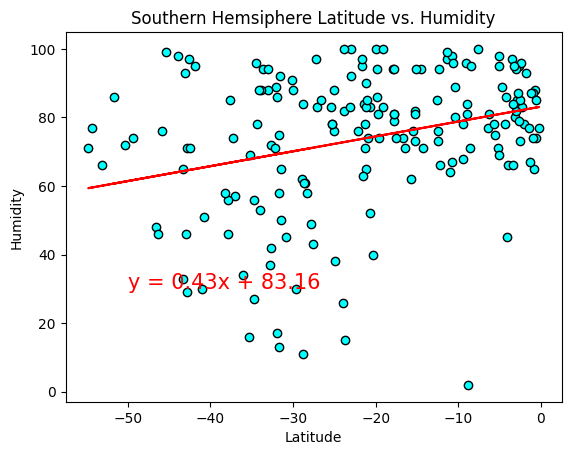

In [32]:
# Southern Hemisphere
southern_humidity = southern_hemi_df['Humidity']

scatter_plots(southern_latitude, southern_humidity, (-50, 30))
plt.ylabel('Humidity')
plt.title('Southern Hemsiphere Latitude vs. Humidity')
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere there is a strong correlation between humidity and latitude; as you approach the equator, the humidity decreases. Meanwhile in the Southern Hemisphere there is a weak correlation where humidity increases as you approach the equator. 

I did not expect these results as I thought humidity would increase as you got closer to the equator for both hemispheres. My assumption was based on the fact that I more often attribute proximity to the equator as more coastal and beachy climates (think of the Caribbean) but I was not thinking of the entire globe (Africa/Europe/Asia/etc.).

### Cloudiness vs. Latitude Linear Regression Plot

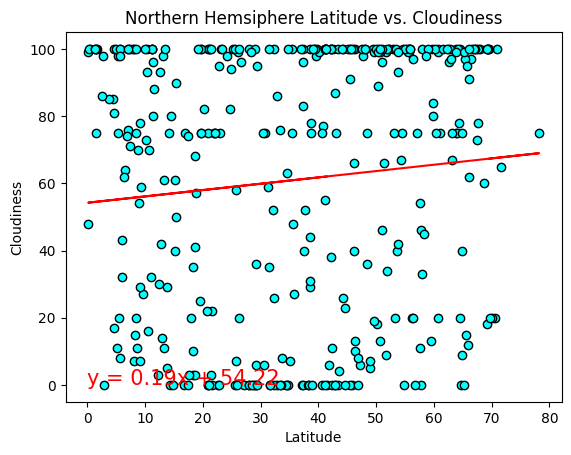

In [33]:
# Northern Hemisphere
northern_cloudiness = northern_hemi_df['Cloudiness']

scatter_plots(northern_latitude, northern_cloudiness, (0, 0))
plt.ylabel('Cloudiness')
plt.title('Northern Hemsiphere Latitude vs. Cloudiness')
plt.show()

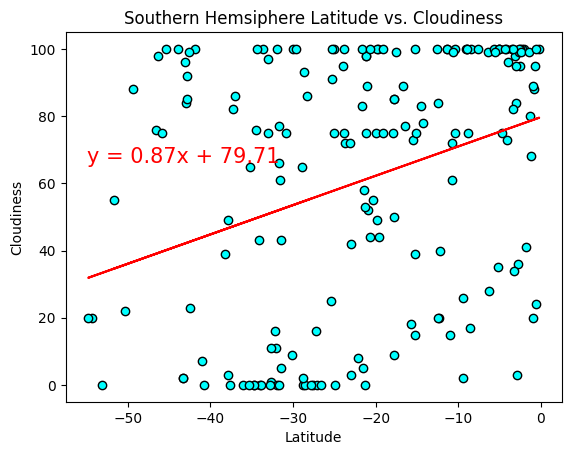

In [34]:
# Southern Hemisphere
southern_cloudiness = southern_hemi_df['Cloudiness']

scatter_plots(southern_latitude, southern_cloudiness, (-55, 66))
plt.ylabel('Cloudiness')
plt.title('Southern Hemsiphere Latitude vs. Cloudiness')
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere cloudiness decreases as you get closer to the equator and the same applied to the Southern Hemisphere. This makes sense because we expect it to be sunnier/warmer near the equator. I noted a strong correlation in the Northern Hemisphere and very strong correlation in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

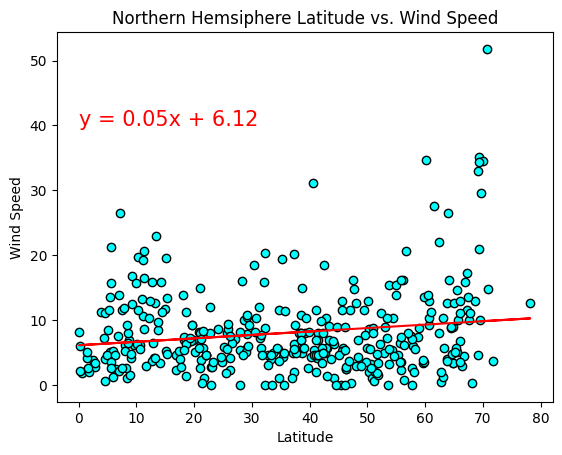

In [36]:
# Northern Hemisphere
northern_wind_speed = northern_hemi_df['Wind Speed']

scatter_plots(northern_latitude, northern_wind_speed, (0, 40))
plt.ylabel('Wind Speed')
plt.title('Northern Hemsiphere Latitude vs. Wind Speed')
plt.show()

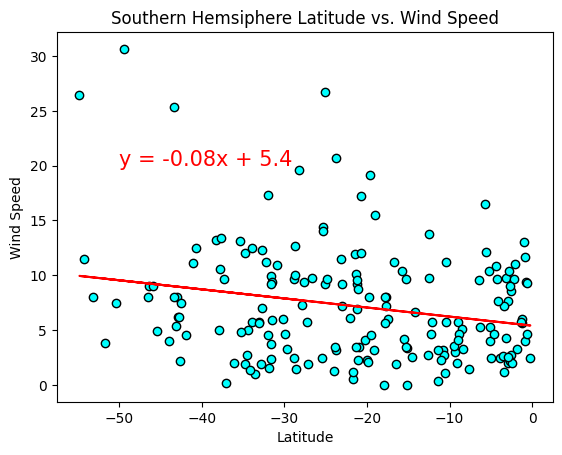

In [37]:
# Southern Hemisphere
southern_wind_speed = southern_hemi_df['Wind Speed']

scatter_plots(southern_latitude, southern_wind_speed, (-50, 20))
plt.ylabel('Wind Speed')
plt.title('Southern Hemsiphere Latitude vs. Wind Speed')
plt.show()

**Discussion about the linear relationship:** 

There is very weak correlation of wind speed to latitude given these results (coefficient is relatively flat) for both the Northern and Southern Hemispheres. This makes sense as proximity to the equator should not impact wind speed. 